# Team Members and Contributions
![Contributions](https://github.com/SHIROKAMIQQ/cs138project/blob/main/contributions.png?raw=true)

# Pledge

![Pledge](https://github.com/SHIROKAMIQQ/cs138project/blob/main/pledge.png?raw=true)

# Summary

Due to its position in the Ring of Fire, the Philippines experiences a great number of earthquakes every year, causing severe structural damage and loss of lives. As such, finding a way to model earthquakes in the country can help in identifying where the most vulnerable parts are and preparing for the next incident.

For this project, we will be mapping reports of earthquake magnitude and intensity across various parts of the country during the Magnitude 7.6 Earthquake in Davao that occurred on December 2023.


# Methods

The project can be divided onto three parts,
- Data preprocessing
- Synthetic Data Generation
- Vulnerability Assessment
- Accuracy Testing through Spatio-temporal Analysis

## Data Gathering and Preprocessing

The project will use three datasets for the mapping of the earthquake: the Did You Feel It Survey from the United States Geological Survey (USGS), the Android alerts from the Earthquake Notification Service sourced from Zenodo, as well as the PHIVOLCS Earthquake Bulletins.

We first condense the USGS dataset to a period with the most earthquakes

### Condensing by Time

In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [40]:
df_usgs = pd.read_csv("https://raw.githubusercontent.com/SHIROKAMIQQ/cs138project/refs/heads/main/USGS_DATA.csv")
df_usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-12-01T01:41:44.083Z,7.3542,127.1211,32.106,4.6,mb,37.0,102.0,1.556,1.20,...,2025-12-01T01:56:36.040Z,"60 km E of Baculin, Philippines",earthquake,8.26,5.249,0.086,40.0,reviewed,us,us
1,2025-11-29T20:01:55.543Z,20.9089,120.9937,10.000,4.9,mb,72.0,89.0,1.901,0.53,...,2025-11-29T20:29:11.040Z,"113 km WNW of Basco, Philippines",earthquake,6.58,1.729,0.055,105.0,reviewed,us,us
2,2025-11-28T15:28:50.406Z,5.7609,126.2621,152.659,4.5,mb,27.0,113.0,1.285,0.75,...,2025-11-28T16:05:59.040Z,"67 km S of Pondaguitan, Philippines",earthquake,11.16,7.700,0.099,30.0,reviewed,us,us
3,2025-11-27T12:31:12.622Z,4.0539,126.6627,22.361,4.9,mb,61.0,69.0,1.359,1.04,...,2025-11-27T13:05:40.040Z,"199 km SE of Sarangani, Philippines",earthquake,6.71,5.601,0.085,44.0,reviewed,us,us
4,2025-11-27T09:59:14.142Z,1.6515,126.4031,53.253,4.8,mb,40.0,51.0,3.197,1.26,...,2025-11-27T10:43:53.040Z,"143 km E of Bitung, Indonesia",earthquake,6.83,8.660,0.107,27.0,reviewed,us,us


In [41]:
df_usgs['time'] = df_usgs['time'].str[:10]
df_usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-12-01,7.3542,127.1211,32.106,4.6,mb,37.0,102.0,1.556,1.20,...,2025-12-01T01:56:36.040Z,"60 km E of Baculin, Philippines",earthquake,8.26,5.249,0.086,40.0,reviewed,us,us
1,2025-11-29,20.9089,120.9937,10.000,4.9,mb,72.0,89.0,1.901,0.53,...,2025-11-29T20:29:11.040Z,"113 km WNW of Basco, Philippines",earthquake,6.58,1.729,0.055,105.0,reviewed,us,us
2,2025-11-28,5.7609,126.2621,152.659,4.5,mb,27.0,113.0,1.285,0.75,...,2025-11-28T16:05:59.040Z,"67 km S of Pondaguitan, Philippines",earthquake,11.16,7.700,0.099,30.0,reviewed,us,us
3,2025-11-27,4.0539,126.6627,22.361,4.9,mb,61.0,69.0,1.359,1.04,...,2025-11-27T13:05:40.040Z,"199 km SE of Sarangani, Philippines",earthquake,6.71,5.601,0.085,44.0,reviewed,us,us
4,2025-11-27,1.6515,126.4031,53.253,4.8,mb,40.0,51.0,3.197,1.26,...,2025-11-27T10:43:53.040Z,"143 km E of Bitung, Indonesia",earthquake,6.83,8.660,0.107,27.0,reviewed,us,us


In [42]:
df_counts = df_usgs['time'].value_counts()
df_counts

time
2023-12-03    196
2023-12-02    176
2009-02-12     94
2009-02-11     88
2023-12-04     83
             ... 
2025-10-30      1
2025-11-06      1
2025-11-08      1
2025-10-09      1
2025-10-22      1
Name: count, Length: 6245, dtype: int64

Plot the dataframe to observe trends

In [43]:
import plotly.express as px

fig = px.scatter(df_counts, x = df_counts.index, y = df_counts, title='Number of Philippine Earthquakes')
fig.show()

From the seen trend, the data shall be condensed onto the earthquakes that had only occurred during the time period December 2, 2023 until December 12, 2023.

This time range was considered as it contained the most amount of earthquakes during a 10-day period condensed on that area, with 678 recorded latitude-longitude points.

This period was also considered from the continual magnitude 4-6 earthquakes that occurred during the said 10-day period after the initial 7.6 magnitude earthquake.

In [44]:
df_2023_12 = df_usgs[((df_usgs['time'] > '2023-12-01') & (df_usgs['time'] < '2023-12-13')) & df_usgs['place'].str.contains('Philippines')]
df_2023_12.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,8.610241,126.738028,47.792100,4.636873,53.995575,108.032448,2.163239,0.674572,9.708156,5.716307,0.102473,49.766962
std,0.911473,0.490066,23.163053,0.401545,39.542005,29.176570,1.499600,0.218767,2.308975,2.689893,0.040445,54.960644
min,4.928300,120.564500,2.716000,4.000000,10.000000,13.000000,0.647000,0.130000,2.260000,0.660000,0.028000,4.000000
25%,8.394900,126.598275,35.000000,4.400000,27.000000,90.000000,1.728500,0.520000,8.362500,2.013750,0.070000,18.000000
50%,8.516400,126.739900,53.075500,4.500000,41.000000,116.000000,1.898000,0.650000,9.675000,6.414500,0.100500,28.000000
75%,8.732825,126.916825,63.518500,4.800000,68.000000,128.000000,2.143000,0.817500,11.157500,7.833250,0.128000,58.000000
max,21.510100,127.689100,115.537000,7.600000,275.000000,184.000000,15.745000,1.430000,15.770000,12.404000,0.300000,416.000000


In [45]:
df_2023_12.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2124,2023-12-12,8.6012,126.3144,70.017,4.6,mb,55.0,131.0,1.687,0.91,...,2024-02-17T22:43:07.040Z,"11 km NE of Gamut, Philippines",earthquake,11.86,7.264,0.084,42.0,reviewed,us,us
2125,2023-12-12,8.4992,126.9133,30.217,4.3,mb,18.0,128.0,1.940,0.45,...,2024-02-17T22:43:12.040Z,"64 km NE of Barcelona, Philippines",earthquake,9.74,5.217,0.154,13.0,reviewed,us,us
2126,2023-12-12,8.4449,126.5995,47.700,4.3,mb,18.0,126.0,1.700,1.16,...,2024-02-17T22:43:12.040Z,"30 km ENE of Hinatuan, Philippines",earthquake,8.39,8.517,0.153,14.0,reviewed,us,us
2127,2023-12-12,8.4228,126.5154,50.120,4.4,mb,23.0,119.0,1.633,0.40,...,2024-02-17T22:43:12.040Z,"20 km ENE of Hinatuan, Philippines",earthquake,9.09,7.835,0.134,18.0,reviewed,us,us
2128,2023-12-12,8.4040,126.8793,36.009,4.6,mb,70.0,71.0,1.849,0.68,...,2024-02-17T22:43:12.040Z,"56 km ENE of Barcelona, Philippines",earthquake,4.15,7.320,0.078,58.0,reviewed,us,us


In [46]:
df_2023_12.to_csv('202312Dataset.csv', index=None)

### Condensing by Space
#### Spatial Clustering of Relevant Points

From this, we had then spatially clustered the dataset from USGS. This is done by taking the haversine distance of each point/row and applying the DBSCAN clustering algorithm (Boeing, 2014), where the maximum distance between neighbors is 30 kilometers. Within this, we also fitted the cluster into a square, which will help us make a square matrix for further processes. 

This is to be used for the area to be compared to the L by L matrix made by the Synthetic Data Later on

Largest cluster: 0 with 661 points
Saved largest cluster to 202312Spacial.csv
Square bounding box (lat/lon degrees):
latitude:  7.4210 to 9.8038
longitude: 125.7307 to 128.1135


C:\Users\Stephen\AppData\Local\Temp\ipykernel_17320\1589618197.py:64: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



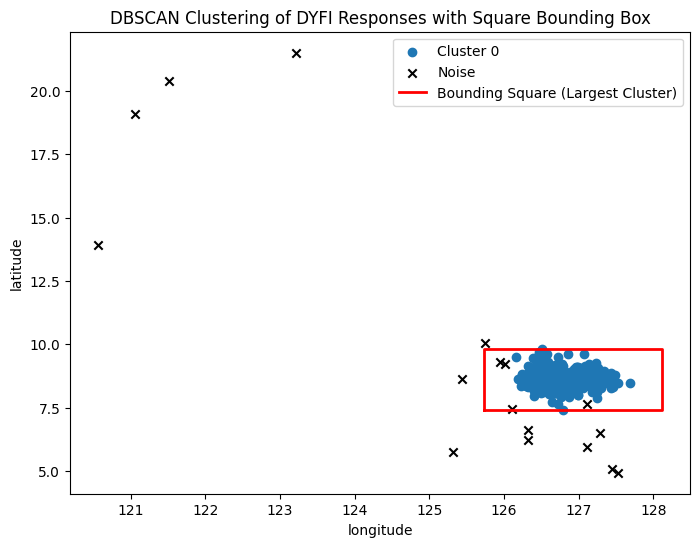

In [47]:
INPUT_FILE = "202312Dataset.csv"
OUTPUT_FILE = "202312Spacial.csv"

# This acts as the threshold for considering how close cells must be to each other
#  to be considered part of the same neighborhood/cluster.
EPS_KM = 30
EARTH_RADIUS_KM = 6371.0
EPS_RAD = EPS_KM / EARTH_RADIUS_KM

# Load .csv file
# This assumes dyfi for now. 
csv_file = INPUT_FILE  # replace with your file path
df = pd.read_csv(csv_file)
coords = df[['latitude', 'longitude']].to_numpy()

# DBSCAN clustering using Haversine distance
# https://stackoverflow.com/questions/24762435/clustering-geo-location-coordinates-lat-long-pairs-using-kmeans-algorithm-with
# https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/ 
coords_rad = np.radians(coords)  # lat/lon in radians
db = DBSCAN(eps=EPS_RAD, min_samples=3, metric='haversine')
# print("DB:", db)
labels = db.fit_predict(coords_rad)
# print("labels:", labels)
df['Cluster'] = labels

# Find largest cluster/neighborhood
unique_labels = [l for l in set(labels) if l != -1]  # exclude noise
if not unique_labels:
    raise ValueError("No clusters found. Try increasing eps or decreasing min_samples.")
cluster_sizes = {l: np.sum(labels == l) for l in unique_labels}
largest_cluster_label = max(cluster_sizes, key=cluster_sizes.get)
print(f"Largest cluster: {largest_cluster_label} with {cluster_sizes[largest_cluster_label]} points")

# Extract rows of largest cluster to dyfi_largest_cluster.csv
largest_cluster_rows = df[df['Cluster'] == largest_cluster_label]
largest_cluster_rows.to_csv(OUTPUT_FILE, index=False)
print(f"Saved largest cluster to {OUTPUT_FILE}")

# Compute square in terms of lat/lon
lat_min = largest_cluster_rows['latitude'].min()
lat_max = largest_cluster_rows['latitude'].max()
lon_min = largest_cluster_rows['longitude'].min()
lon_max = largest_cluster_rows['longitude'].max()
lat_range = lat_max - lat_min
lon_range = lon_max - lon_min
max_range = max(lat_range, lon_range)

# Build square bounding box (equal sides)
lat_mid = (lat_max + lat_min)/2
lon_mid = (lon_max + lon_min)/2
half_size = max_range/2

square_lat_min = lat_mid - half_size
square_lat_max = lat_mid + half_size
square_lon_min = lon_mid - half_size
square_lon_max = lon_mid + half_size

print("Square bounding box (lat/lon degrees):")
print(f"latitude:  {square_lat_min:.4f} to {square_lat_max:.4f}")
print(f"longitude: {square_lon_min:.4f} to {square_lon_max:.4f}")

# Plot
plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap('tab20', len(unique_labels))

for k in unique_labels:
    mask = (labels == k)
    xy = coords[mask]
    plt.scatter(xy[:,1], xy[:,0], label=f'Cluster {k}')

# noise points
mask_noise = (labels == -1)
plt.scatter(coords[mask_noise,1], coords[mask_noise,0], c='k', marker='x', label='Noise')

# overlay square of largest cluster
square_lon = [square_lon_min, square_lon_max, square_lon_max, square_lon_min, square_lon_min]
square_lat = [square_lat_min, square_lat_min, square_lat_max, square_lat_max, square_lat_min]
plt.plot(square_lon, square_lat, 'r-', linewidth=2, label='Bounding Square (Largest Cluster)')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('DBSCAN Clustering of DYFI Responses with Square Bounding Box')
plt.legend()
plt.show()

## Synthetic Data Generation

A modified Olami-Feder-Christensen (OFC) model will be used to simulate synthetic earthquakes and produce data from different simulated intensities, adapted from (Greco et al., 2019) and (Ferreira et al., 2022). Which is a cellular automaton model that starts with an $L times L$ matrix wherein for each cell (i, j) inside the matrix, there corresponds some seismologic force $F$. This aims to mimic the uniform motion of tectonic plates, the $F_(t h )$ is a threshold value that indicates the limit of the friction force. This automata follows the following relaxation rule:

This said model is said to reproduce the statistical features of earthquakes which shall be suited for vulnerability assessment for urban areas.



In [48]:
# TODO insert OFC code here

## Vulnerability Assessment

The synthetic data generated by the modified OFC model shall give a size $S$ which is the energy released by the entire seismic event, this is determined through the total amount of 'activated' $F_{th} = 1$ sites during the simulation.

Since S is the energy of the event, the Magnitude $M$ can be determined through
$ M = ln(S) $ From (Greco et al., 2019), this can be 

## Accuracy Testing through Spatio-temporal Analysis

# Results

So far, we've been able spatially cluster the dataset from USGS. This is done by taking the haversine distance of each point/row and applying the DBSCAN clustering algorithm (Boeing, 2014), where the maximum distance between neighbors is 30 kilometers. Within this, we also fitted the cluster into a square, which will help us make a square matrix for further processes. 

Largest cluster: 0 with 661 points
Saved largest cluster to 202312Spacial.csv
Square bounding box (lat/lon degrees):
latitude:  7.4210 to 9.8038
longitude: 125.7307 to 128.1135


C:\Users\Stephen\AppData\Local\Temp\ipykernel_17320\2952209718.py:41: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



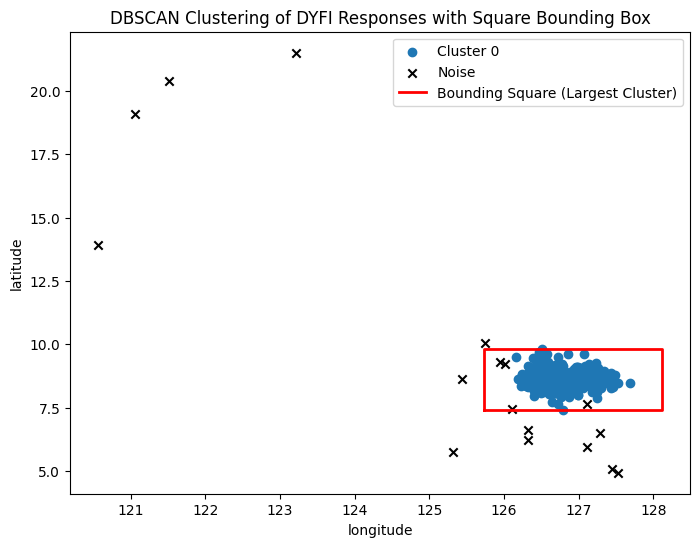

In [50]:
df['Cluster'] = labels

# Find largest cluster/neighborhood
unique_labels = [l for l in set(labels) if l != -1]  # exclude noise
if not unique_labels:
    raise ValueError("No clusters found. Try increasing eps or decreasing min_samples.")
cluster_sizes = {l: np.sum(labels == l) for l in unique_labels}
largest_cluster_label = max(cluster_sizes, key=cluster_sizes.get)
print(f"Largest cluster: {largest_cluster_label} with {cluster_sizes[largest_cluster_label]} points")

# Extract rows of largest cluster to dyfi_largest_cluster.csv
largest_cluster_rows = df[df['Cluster'] == largest_cluster_label]
largest_cluster_rows.to_csv(OUTPUT_FILE, index=False)
print(f"Saved largest cluster to {OUTPUT_FILE}")

# Compute square in terms of lat/lon
lat_min = largest_cluster_rows['latitude'].min()
lat_max = largest_cluster_rows['latitude'].max()
lon_min = largest_cluster_rows['longitude'].min()
lon_max = largest_cluster_rows['longitude'].max()
lat_range = lat_max - lat_min
lon_range = lon_max - lon_min
max_range = max(lat_range, lon_range)

# Build square bounding box (equal sides)
lat_mid = (lat_max + lat_min)/2
lon_mid = (lon_max + lon_min)/2
half_size = max_range/2

square_lat_min = lat_mid - half_size
square_lat_max = lat_mid + half_size
square_lon_min = lon_mid - half_size
square_lon_max = lon_mid + half_size

print("Square bounding box (lat/lon degrees):")
print(f"latitude:  {square_lat_min:.4f} to {square_lat_max:.4f}")
print(f"longitude: {square_lon_min:.4f} to {square_lon_max:.4f}")

# Plot
plt.figure(figsize=(8,6))
colors = plt.cm.get_cmap('tab20', len(unique_labels))

for k in unique_labels:
    mask = (labels == k)
    xy = coords[mask]
    plt.scatter(xy[:,1], xy[:,0], label=f'Cluster {k}')

# noise points
mask_noise = (labels == -1)
plt.scatter(coords[mask_noise,1], coords[mask_noise,0], c='k', marker='x', label='Noise')

# overlay square of largest cluster
square_lon = [square_lon_min, square_lon_max, square_lon_max, square_lon_min, square_lon_min]
square_lat = [square_lat_min, square_lat_min, square_lat_max, square_lat_max, square_lat_min]
plt.plot(square_lon, square_lat, 'r-', linewidth=2, label='Bounding Square (Largest Cluster)')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('DBSCAN Clustering of DYFI Responses with Square Bounding Box')
plt.legend()
plt.show()

# References
Boeing, G. (2014). Clustering to Reduce Spatial Data Set Size. https://geoffboeing.com/2014/08/
clustering-to-reduce-spatial-data-set-size/

Ferreira, D., Ribeiro, J., Oliveira, P., Pimenta, A., Freitas, R., Dutra, R., Papa, A., & Mendes, J. (2022). 
Spatiotemporal analysis of earthquake occurrence in synthetic and worldwide data. Chaos 
Solitons & Fractals, 165, 112814. https://doi.org/10.1016/j.chaos.2022.112814

Greco, A., Pluchino, A., Barbarossa, L., Barreca, G., Caliò, I., Martinico, F., & Rapisarda, A. (2019). A 
New Agent-Based Methodology for the Seismic Vulnerability Assessment of Urban Areas. ISPRS 
International Journal of Geo-Information, 8(6). https://doi.org/10.3390/ijgi8060274